In [1]:
!pip install pytorch-pretrained-bert 

     |████████████████████████████████| 123 kB 4.1 MB/s 
     |████████████████████████████████| 131 kB 34.1 MB/s 
     |████████████████████████████████| 79 kB 7.3 MB/s 
     |████████████████████████████████| 8.0 MB 55.3 MB/s 
     |████████████████████████████████| 138 kB 41.0 MB/s 
     |████████████████████████████████| 127 kB 55.8 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
import torch 
from pytorch_pretrained_bert import BertTokenizer 
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

100%|██████████| 231508/231508 [00:00<00:00, 318170.37B/s]


In [10]:
# this is to write the vocab as a txt file 
with open('vocabulary.txt', 'w') as f:
  for token in tokenizer.vocab.keys():
      f.write(token + '\n')
  print(len(tokenizer.vocab),type(tokenizer.vocab)) #30522

30522 <class 'collections.OrderedDict'>


Inspecting the vocab txt, the first 1000 are special tokens then comes with characters. 
The 1st word is 'the' at position 1997, seems sorted by frequency since there? 
1-[PAD]
101-[UNK]
102-[CLS]
103-[SEP]
104-[MASK]

In [21]:
one_chars = []
one_chars_hashes = []

for token in tokenizer.vocab.keys():
  if len(token) ==1:#single char tokens
    one_chars.append(token)

  elif len(token) == 3 and token[0:2] == '##':
    one_chars_hashes.append(token)

#number of single character
print('Number of single character tokens:', len(one_chars), '\n')
for i in range(0, len(one_chars), 40):
  end = min(i+40, len(one_chars)+1)
  print(''.join(one_chars[i:end]))


Number of single character tokens: 997 

!"#$%&'()*+,-./0123456789:;<=>?@[\]^_`ab
cdefghijklmnopqrstuvwxyz{|}~¡¢£¤¥¦§¨©ª«¬
®°±²³´µ¶·¹º»¼½¾¿×ßæð÷øþđħıłŋœƒɐɑɒɔɕəɛɡɣɨ
ɪɫɬɯɲɴɹɾʀʁʂʃʉʊʋʌʎʐʑʒʔʰʲʳʷʸʻʼʾʿˈːˡˢˣˤαβγδ
εζηθικλμνξοπρςστυφχψωабвгдежзиклмнопрсту
фхцчшщъыьэюяђєіјљњћӏաբգդեթիլկհմյնոպսվտրւ
ք־אבגדהוזחטיךכלםמןנסעףפץצקרשת،ءابةتثجحخد
ذرزسشصضطظعغـفقكلمنهوىيٹپچکگںھہیےअआउएकखगच
जटडणतथदधनपबभमयरलवशषसहािीो।॥ংঅআইউএওকখগচছজ
টডণতথদধনপবভমযরলশষসহািীেகசடதநனபமயரலளவாிுே
ைನರಾකයරලවාกงตทนพมยรลวสอาเ་།གངདནཔབམའརལསမა
ბგდევთიკლმნორსტუᄀᄂᄃᄅᄆᄇᄉᄊᄋᄌᄎᄏᄐᄑ하ᅢᅥᅦᅧᅩᅪᅭᅮ
ᅯᅲᅳᅴᅵᆨᆫᆯᆷᆸᆼᴬᴮᴰᴵᴺᵀᵃᵇᵈᵉᵍᵏᵐᵒᵖᵗᵘᵢᵣᵤᵥᶜᶠ‐‑‒–—―
‖‘’‚“”„†‡•…‰′″›‿⁄⁰ⁱ⁴⁵⁶⁷⁸⁹⁺⁻ⁿ₀₁₂₃₄₅₆₇₈₉₊₍
₎ₐₑₒₓₕₖₗₘₙₚₛₜ₤₩€₱₹ℓ№ℝ™⅓⅔←↑→↓↔↦⇄⇌⇒∂∅∆∇∈−∗
∘√∞∧∨∩∪≈≡≤≥⊂⊆⊕⊗⋅─│■▪●★☆☉♠♣♥♦♭♯⟨⟩ⱼ⺩⺼⽥、。〈〉
《》「」『』〜あいうえおかきくけこさしすせそたちっつてとなにぬねのはひふへほまみ
むめもやゆよらりるれろをんァアィイウェエオカキクケコサシスセタチッツテトナニノハ
ヒフヘホマミムメモャュョラリルレロワン・ー一三上下不世中主久之也事二五井京人亻仁
介代仮伊会佐侍保信健元光八公内出分前劉力加勝北区十千南博原口古史司合吉同名和囗四
国國土地坂城堂場士夏外大天太夫奈女子学宀宇安宗定宣宮家宿寺將小尚山岡島崎川州巿帝
平年幸广弘張彳後御德心忄志忠愛成我戦戸手扌政文新方日明星春昭智曲書月有朝木本李村
東松林森楊樹橋歌止正武比氏民水氵氷永江沢河治法海清漢瀬火版犬王生田男疒発白的皇目
相省真石示社神福禾秀秋空立章竹糹

In [22]:
print('number of single character tokens with hashes:', len(one_chars_hashes),'\n') #sorted by frequency>??
tokens = [token.replace('##','') for token in one_chars_hashes]
for i in range(0, len(tokens), 40): #40 element per row
  end = min(i+40, len(tokens)+1)
  print(''.join(tokens[i:end]))

number of single character tokens with hashes: 997 

saeinodrytlmuhkcgp2z1b3f467xv8590wjq°₂аи
²₃ı₁⁺½оهيαеدنνøр₄₀رя³ιłнᵢₙßةςم−тːلьк♭ηیв
ا×¹ыהɛл!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~¡
¢£¤¥¦§¨©ª«¬®±´µ¶·º»¼¾¿æð÷þđħŋœƒɐɑɒɔɕəɡɣɨ
ɪɫɬɯɲɴɹɾʀʁʂʃʉʊʋʌʎʐʑʒʔʰʲʳʷʸʻʼʾʿˈˡˢˣˤβγδεζ
θκλμξοπρστυφχψωбгджзмпсуфхцчшщъэюђєіјљњћ
ӏաբգդեթիլկհմյնոպսվտրւք־אבגדוזחטיךכלםמןנס
עףפץצקרשת،ءبتثجحخذزسشصضطظعغـفقكوىٹپچکگںھ
ہےअआउएकखगचजटडणतथदधनपबभमयरलवशषसहािीो।॥ংঅআ
ইউএওকখগচছজটডণতথদধনপবভমযরলশষসহািীেகசடதநனப
மயரலளவாிுேைನರಾකයරලවාกงตทนพมยรลวสอาเ་།གངད
ནཔབམའརལསမაბგდევთიკლმნორსტუᄀᄂᄃᄅᄆᄇᄉᄊᄋᄌᄎᄏᄐᄑ
하ᅢᅥᅦᅧᅩᅪᅭᅮᅯᅲᅳᅴᅵᆨᆫᆯᆷᆸᆼᴬᴮᴰᴵᴺᵀᵃᵇᵈᵉᵍᵏᵐᵒᵖᵗᵘᵣᵤ
ᵥᶜᶠ‐‑‒–—―‖‘’‚“”„†‡•…‰′″›‿⁄⁰ⁱ⁴⁵⁶⁷⁸⁹⁻ⁿ₅₆₇₈
₉₊₍₎ₐₑₒₓₕₖₗₘₚₛₜ₤₩€₱₹ℓ№ℝ™⅓⅔←↑→↓↔↦⇄⇌⇒∂∅∆∇∈
∗∘√∞∧∨∩∪≈≡≤≥⊂⊆⊕⊗⋅─│■▪●★☆☉♠♣♥♦♯⟨⟩ⱼ⺩⺼⽥、。〈〉
《》「」『』〜あいうえおかきくけこさしすせそたちっつてとなにぬねのはひふへほまみ
むめもやゆよらりるれろをんァアィイウェエオカキクケコサシスセタチッツテトナニノハ
ヒフヘホマミムメモャュョラリルレロワン・ー一三上下不世中主久之也事二五井京人亻仁
介代仮伊会佐侍保信健元光八公内出分前劉力加勝北区十千南博原口古史司合吉同名和囗四
国國土地坂城堂場士夏外大天太夫奈女子学宀宇安宗定宣宮家宿寺將小尚山岡島崎川州巿帝
平年幸广弘張彳後御德心忄志忠愛成我戦戸手扌政文新方日明星春昭智曲書月有朝木本李村
東松林森楊樹橋歌止正武比氏民水氵氷永江沢河治法海清漢瀬火版犬王生田男疒発白的皇目
相省真石

In [23]:
print('Are the two sets identical?', set(one_chars) == set(tokens))

Are the two sets identical? True


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style= 'darkgrid')
sns.set(font_scale = 1.5)
plt.rcParams['figure.figsize'] = (10,5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Maximum token length: 18


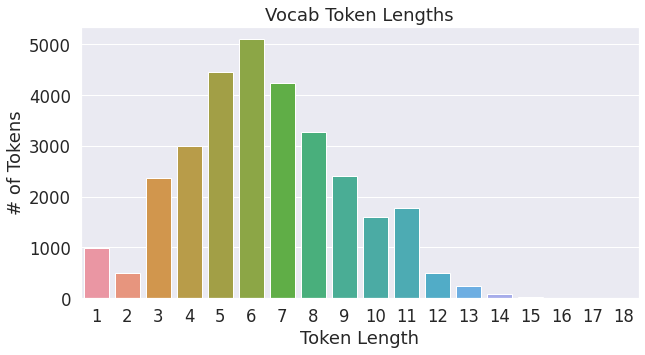

In [28]:
token_lengths = [len(token) for token in tokenizer.vocab.keys()] # a list of numbers(len(token))
sns.countplot(token_lengths)
plt.title('Vocab Token Lengths')
plt.xlabel('Token Length')
plt.ylabel('# of Tokens')

print('Maximum token length:', max(token_lengths))

Number of subwords: 5,828 of 30,522
19.1%


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, '# of ## subwords')

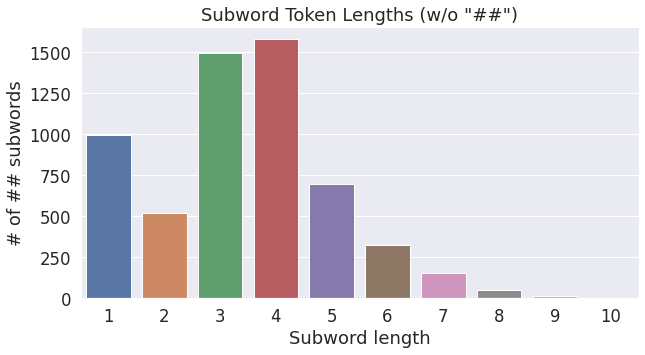

In [30]:
# take a look at tokens begin with ##
num_subwords = 0
subword_lengths = []

for token in tokenizer.vocab.keys():
  if len(token) >=2 and token[0:2] == '##':
    num_subwords += 1
    length = len(token)-2
    subword_lengths.append(length)

vocab_size = len(tokenizer.vocab.keys())
print('Number of subwords: {:,} of {:,}'.format(num_subwords, vocab_size))
# look at the percentage of ##subword out of vocab
prcnt = float(num_subwords) / vocab_size *100.0
print('%.1f%%' % prcnt)

########################################make some plot###################################
sns.countplot(subword_lengths)
plt.title('Subword Token Lengths (w/o "##")')
plt.xlabel('Subword length')
plt.ylabel('# of ## subwords')